<a href="https://colab.research.google.com/github/emmanuellea/bean-_disease-_classification/blob/master/bean_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import random
from imutils import paths
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2

In [2]:
path='/content/drive/My Drive/Datasets/ibean'

In [4]:
image_path=list(paths.list_images(path))

In [5]:
random.shuffle(image_path)

In [6]:
data=[]
label=[]

for image in image_path:
  img=load_img(image, target_size=(224, 224))
  data.append(img)

  labels=image.split(os.path.sep)[-2]
  label.append(labels)

In [7]:
label_classes=['Angular_leaf_spot', 'bean rust', 'healthy']

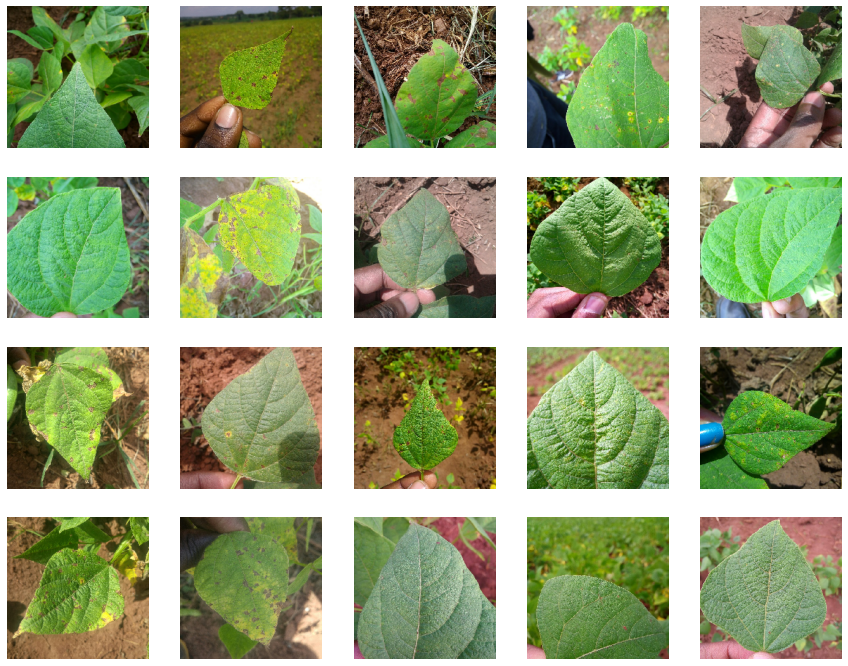

In [14]:
fig=plt.figure(figsize=(15, 12))
for i in range(0, 20):
  fig.add_subplot(4, 5, i + 1)
  plt.imshow(data[i])
  plt.axis('off')
plt.show()

In [20]:
data=[]
label=[]

for image in image_path:
  img=load_img(image, target_size=(224, 224))
  data.append(img)

  labels=image.split(os.path.sep)[-2]
  label.append(labels)


In [ ]:
print(label[:20])

['angular_leaf_spot', 'angular_leaf_spot', 'healthy', 'healthy', 'healthy', 'angular_leaf_spot', 'bean_rust', 'angular_leaf_spot', 'healthy', 'healthy', 'healthy', 'healthy', 'angular_leaf_spot', 'healthy', 'bean_rust', 'bean_rust', 'bean_rust', 'bean_rust', 'healthy', 'bean_rust']


In [ ]:
lb=LabelEncoder()
label=lb.fit_transform(label)

In [ ]:
label=to_categorical(label)

In [ ]:
label=np.array(label)

In [ ]:
print(len(data))

1295


In [ ]:
print(len(label))

1295


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(data, label, test_size=0.2, random_state=42)

In [ ]:
x_train=np.array(x_train).reshape(-1, 224, 224, 3)
x_test=np.array(x_test).reshape(-1, 224, 224, 3)

In [ ]:
image_aug =ImageDataGenerator(rotation_range=30, shear_range=0.2, 
    zoom_range=0.2, height_shift_range=0.2, width_shift_range=0.2, 
    horizontal_flip=True, fill_mode='nearest')

In [ ]:
base_model=ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

In [ ]:
head_model=base_model.output
head_model=GlobalAveragePooling2D()(head_model)
head_model=Flatten()(head_model)
head_model=Dropout(0.5)(head_model)
head_model=Dense(128, activation='relu')(head_model)
head_model=Dropout(0.5)(head_model)
head_model=Dense(64, activation='relu')(head_model)
head_model=Dropout(0.5)(head_model)
head_model=Dense(32, activation='relu')(head_model)
head_model=Dropout(0.5)(head_model)
head_model=Dense(3, activation='softmax')(head_model)

In [ ]:
model=Model(inputs=base_model.input, outputs=head_model)

In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(image_aug.flow(x_train, y_train), epochs=150, verbose=1, validation_data=(x_test, y_test))

Epoch 1/150
33/33 [==============================] - 11s 341ms/step - loss: 0.4518 - accuracy: 0.8485 - val_loss: 0.2749 - val_accuracy: 0.8803
Epoch 2/150
33/33 [==============================] - 11s 344ms/step - loss: 0.4548 - accuracy: 0.8292 - val_loss: 0.2532 - val_accuracy: 0.9189
Epoch 3/150
33/33 [==============================] - 11s 343ms/step - loss: 0.4221 - accuracy: 0.8446 - val_loss: 0.2783 - val_accuracy: 0.8803
Epoch 4/150
33/33 [==============================] - 11s 343ms/step - loss: 0.4190 - accuracy: 0.8571 - val_loss: 0.2484 - val_accuracy: 0.9073
Epoch 5/150
33/33 [==============================] - 11s 343ms/step - loss: 0.4290 - accuracy: 0.8456 - val_loss: 0.2730 - val_accuracy: 0.9035
Epoch 6/150
33/33 [==============================] - 11s 341ms/step - loss: 0.4101 - accuracy: 0.8446 - val_loss: 0.2573 - val_accuracy: 0.9112
Epoch 7/150
33/33 [==============================] - 11s 341ms/step - loss: 0.4084 - accuracy: 0.8427 - val_loss: 0.2494 - val_accuracy:

In [ ]:
score=model.evaluate(x_test, y_test)
print('loss: ', score[0])
print('Accuracy: ', score[1])

9/9 [==============================] - 1s 83ms/step - loss: 0.1993 - accuracy: 0.9112
loss:  0.19934317469596863
Accuracy:  0.9111968874931335


In [ ]:
img=load_img('/content/drive/My Drive/Datasets/ibean/validation/bean_rust/bean_rust_val.20.jpg', target_size=(224, 224))
img=img_to_array(img)
img=np.expand_dims(img, axis=0)
img=preprocess_input(img)


prediction=model.predict(img)
preds=np.argmax(prediction, axis=1)
print('label: ', preds[0])
print(label_classes[preds[0]])

label:  1
bean rust


In [ ]:
model.save('bean_disease_classification.h5')